In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import os
import seaborn as sns
import warnings
import scipy.stats as stats

# 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of 
# the data, Use the same for the subsequent questions

In [3]:
os.chdir('C:\\Users\\nikit\\Desktop\\ALABS\\PYTHON CASE STUDIES\\CASE studies\\Case Study 3 - Insurance Claims Case Study')

In [5]:
claims = pd.read_csv('claims.csv')
Demographics = pd.read_csv('cust_demographics.csv')

In [266]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   int64         
 1   customer_id          1100 non-null   int64         
 2   incident_cause       1100 non-null   object        
 3   claim_date           1100 non-null   datetime64[ns]
 4   claim_area           1100 non-null   object        
 5   police_report        1100 non-null   object        
 6   claim_type           1100 non-null   object        
 7   claim_amount         1100 non-null   float64       
 8   total_policy_claims  1100 non-null   float64       
 9   fraudulent           1100 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 86.1+ KB


In [11]:
Demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [19]:
print ('The claims table contains',claims.shape[0],'rows and',claims.shape[1],'columns')
print ('The Customer Demographics table contains', Demographics.shape[0],'rows and',Demographics.shape[1],'columns')

The claims table contains 1100 rows and 10 columns
The Customer Demographics table contains 1085 rows and 6 columns


In [7]:
claims.describe().T

,count,mean,std,min,25%,50%,75%,max
claim_id,1100.0,4.883819e+07,2.918806e+07,26832.0,23815805.0,48539331.0,74074466.00,99775483.0
customer_id,1100.0,5.079954e+07,2.847727e+07,154557.0,26479506.5,49790067.0,76019781.25,99961993.0
total_policy_claims,1090.0,1.591743e+00,1.147251e+00,1.0,1.0,1.0,2.00,8.0


In [9]:
Demographics.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,1085.0,5.084410e+07,2.847987e+07,154557.0,26734721.0,49820646.0,75995055.0,99961993.0


# 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance

# DATA INCONSISTENCIES

In [41]:
Claims_cat = claims.select_dtypes(include = 'object')
for i in Claims_cat:
     print(Claims_cat[i].value_counts())

incident_cause
Other causes          290
Driver error          262
Other driver error    249
Natural causes        189
Crime                 110
Name: count, dtype: int64
claim_date
04/04/2018    18
10/17/2017    17
07/07/2018    17
01/13/2018    17
10/03/2018    16
              ..
06/10/2018     6
01/26/2018     6
08/04/2017     6
08/18/2017     6
08/23/2018     5
Name: count, Length: 100, dtype: int64
claim_area
Auto    985
Home    115
Name: count, dtype: int64
police_report
No         630
Unknown    300
Yes        170
Name: count, dtype: int64
claim_type
Material only          663
Material and injury    241
Injury only            196
Name: count, dtype: int64
claim_amount
$2090       7
$2070       7
$1630       7
$1860       7
$2320       7
           ..
$40210      1
$27002      1
$33030      1
$31498.5    1
$36685      1
Name: count, Length: 683, dtype: int64
fraudulent
No     846
Yes    254
Name: count, dtype: int64


In [53]:
Demographics_cat = Demographics.select_dtypes(include = 'object')
for i in Demographics_cat:
    print(Demographics_cat[i].value_counts())

gender
Male      553
Female    532
Name: count, dtype: int64
DateOfBirth
12-Jan-79    1
26-May-74    1
08-Sep-79    1
18-Jun-87    1
16-Mar-78    1
            ..
20-Jul-82    1
28-Aug-99    1
28-Mar-96    1
21-Dec-84    1
12-Jul-95    1
Name: count, Length: 1085, dtype: int64
State
NY    31
DE    29
AR    29
ME    28
AL    28
ID    27
ND    27
RI    26
CO    26
TN    26
IA    26
FL    25
NV    25
SD    25
MA    25
CT    25
NC    24
WI    24
IL    23
MO    23
IN    22
TX    22
OH    22
VT    22
OK    21
NE    21
MD    21
MT    20
WV    20
PA    20
SC    20
LA    20
KS    19
AK    19
WA    19
GA    19
NM    19
UT    18
VA    18
MI    18
NH    18
CA    17
HI    17
NJ    17
MN    17
MS    17
WY    17
AZ    15
OR    14
KY    14
Name: count, dtype: int64
Contact
789-916-8172    1
327-934-6843    1
154-695-4765    1
196-126-1725    1
972-651-4751    1
               ..
349-214-6872    1
624-716-1427    1
734-137-4865    1
194-786-8173    1
182-385-1392    1
Name: count, Length: 1085, dtype: 

In [ ]:
# Based on the above observation few inconsistencies to be fixed :
- Converting the data type of claim date in claim table  and DOB in customer demographic table to Datetime format.
-Convert the column claim_amount to numeric using the appropriate modules/attributes to remove the $ sign.

## Fixing data inconsistencies:

###  Converting the data type of claim date in claim table  and DOB in customer demographic table to Datetime format.

In [7]:

claims.claim_date = claims.claim_date.str.replace('/','-')
Demographics.DateOfBirth= Demographics.DateOfBirth.str.replace('/','-')

In [9]:
claims.claim_date= pd.to_datetime(claims.claim_date, format = '%m-%d-%Y' )

In [11]:
Demographics.DateOfBirth=pd.to_datetime(Demographics.DateOfBirth, format = '%d-%b-%y')

In [13]:
Demographics[Demographics.DateOfBirth.dt.year >=2000]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
9,33507197,Female,2066-09-09,RI,165-519-4583,Gold
13,21240703,Male,2063-07-22,MD,473-561-2675,Silver
17,63916778,Male,2066-09-07,IL,146-157-4572,Platinum
18,17004138,Female,2065-08-13,WA,436-354-4682,Silver
20,75584003,Female,2067-04-22,OK,723-418-3248,Silver
...,...,...,...,...,...,...
1058,56425562,Female,2063-03-18,GA,823-712-3528,Platinum
1074,87596868,Male,2061-11-18,AZ,573-396-3182,Silver
1077,65208809,Male,2064-04-22,VA,286-128-6132,Platinum
1079,46850495,Male,2062-08-21,NV,761-193-2346,Platinum


In [15]:
# some DOB's in Demographics have the year in 2000s which is not possible , thus need to substract a century.
Demographics.DateOfBirth = np.where(Demographics.DateOfBirth.dt.year >=2000,Demographics.DateOfBirth - pd.DateOffset(years = 100),Demographics.DateOfBirth)

In [17]:
Demographics[Demographics.DateOfBirth.dt.year >=2000]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment


### 3. Convert the column claim_amount to numeric using the appropriate modules/attributes to remove the $ sign.
 


In [19]:
claims.claim_amount= claims.claim_amount.str.replace('$','').astype(float)

In [21]:
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No


# Duplicate values check :

In [ ]:
claims.duplicated().sum()

In [ ]:
Demographics.duplicated().sum()

In [ ]:
## No duplicate records forund in both tables.

# MISSING VALUES

In [43]:
## The Customer Demographics tables lack any null values and is our dimension table in this scenario what claims table is the fact  table.
## The Claims table have 65 null values in the claim amount and 10 null values in the column total_policy_claims


In [ ]:
# The missing values need to be imputated before moving ahead .
## Colmns having categorical values, their missing values to be replaced with mode while in case of continous variables the missing value to be replaced with mean if no outlier present and with median if an outlier is present.

<Axes: xlabel='claim_amount'>

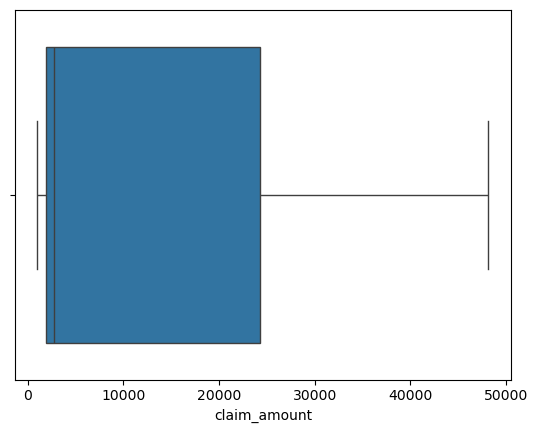

In [25]:
### checking outliers before filling the missing values:
sns.boxplot(claims,x = claims.claim_amount)

# No outliers found in claim amount column .


<Axes: xlabel='total_policy_claims'>

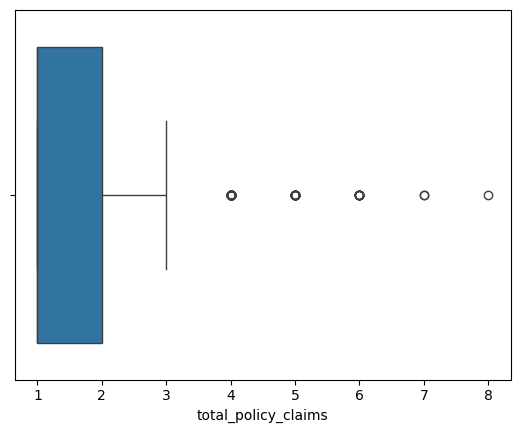

In [27]:
sns.boxplot(claims, x= claims.total_policy_claims)
# It was observed that in total_policy_claims column of claims table positive outliers were present. 
#Thus we will use median  to fill null / missing values  in this column

In [137]:
claims.claim_amount.mean()

12442.125120772947

In [23]:
# Imputing missing values in claims amount column with mean
claims.claim_amount= claims.claim_amount.fillna(claims.claim_amount.mean()) 

In [25]:
claims[claims.claim_amount ==  12442.125120772947 ]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
20,32630720,75584003,Crime,2017-02-03,Auto,No,Material only,12442.125121,1.0,No
22,46956597,10665308,Natural causes,2018-07-20,Auto,No,Material only,12442.125121,1.0,No
47,28636278,31012778,Other causes,2018-03-01,Auto,No,Material only,12442.125121,5.0,Yes
48,96749077,84571128,Natural causes,2017-05-15,Auto,No,Material only,12442.125121,1.0,Yes
66,43973221,83290720,Driver error,2018-09-26,Auto,Yes,Material and injury,12442.125121,1.0,No
...,...,...,...,...,...,...,...,...,...,...
989,78685929,29459103,Natural causes,2017-07-01,Auto,No,Injury only,12442.125121,1.0,Yes
1016,12612736,74787956,Driver error,2017-09-14,Auto,Unknown,Material only,12442.125121,1.0,No
1025,54291209,28528424,Other causes,2018-07-14,Auto,No,Material only,12442.125121,1.0,No
1036,83884815,71676845,Other driver error,2018-07-27,Auto,No,Material only,12442.125121,3.0,No


In [151]:
claims.total_policy_claims.median()

1.0

In [27]:
 # Imputing missing values in total_policy_claims with median:
claims.total_policy_claims = claims.total_policy_claims.fillna(claims.total_policy_claims.median()) 

In [29]:
claims[claims.total_policy_claims ==  1.0 ]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1088,87003624,99120304,Other causes,2017-03-22,Auto,No,Material only,1710.0,1.0,No
1090,56626640,82584690,Other driver error,2017-08-24,Auto,Unknown,Material only,2288.5,1.0,Yes
1092,74995596,55765343,Crime,2018-06-30,Auto,Unknown,Material only,1805.5,1.0,Yes
1094,33194240,18332683,Other causes,2017-11-13,Auto,Yes,Material and injury,24850.0,1.0,No


In [31]:
 claims.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
dtype: int64

In [ ]:
# No missing values left in claims table.

# MERGING THE GIVEN DATASETS:

In [33]:

pd.merge(left = claims, right = Demographics,how= 'left', left_on= 'customer_id', right_on = 'CUST_ID').isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount            0
total_policy_claims     0
fraudulent              0
CUST_ID                15
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
dtype: int64

In [ ]:
# After merging the dataset it was observed that demographics data of 15 customers were missing in Demographics table but entries of such customer available in claims table.
# Thus we will drop these missing values as they are less than 5 % as per industry standards.

In [35]:
Final_dataset= pd.merge(left = claims, right = Demographics,how= 'inner', left_on= 'customer_id', right_on = 'CUST_ID') 

In [31]:
Final_dataset.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
dtype: int64

# 4. Of all the injury claims, some of them have gone unreported with the 
# police. Create an alert flag (1,0) for all such claims

In [37]:
Final_dataset['Report_flag'] = np.where(Final_dataset.police_report=='Yes', 1, 0)

In [39]:
Final_dataset

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Report_flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,0
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,1
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152,Female,1996-07-07,ID,529-462-1635,Silver,0
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,1990-04-11,WI,712-651-9613,Gold,1
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802,Female,1964-10-22,LA,469-345-5617,Silver,0


# 5. Retain the most recent observation and delete any duplicated records in  the data based on the customer ID column

In [56]:
Final_dataset[Final_dataset.customer_id ==19269962]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Report_flag
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,0
631,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,0


In [41]:
Max_date = Final_dataset.pivot_table(index='customer_id' ,values='claim_date', aggfunc='max').reset_index()

In [43]:
Max_date 

,customer_id,claim_date
0,154557,2018-04-10
1,263204,2018-04-04
2,287476,2017-10-17
3,441097,2018-03-21
4,524545,2018-07-27
...,...,...
1073,99674324,2018-07-07
1074,99723844,2018-01-06
1075,99761663,2018-04-04
1076,99892000,2017-11-13


In [45]:
Customer_claim_data= pd.merge(left = Max_date, right = Final_dataset ,how= 'inner', on = ['customer_id','claim_date'] )

In [47]:
Customer_claim_data.drop('CUST_ID', axis = 1, inplace = True )

In [49]:
Customer_claim_data

,customer_id,claim_date,claim_id,incident_cause,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Report_flag
0,154557,2018-04-10,69348631,Driver error,Auto,No,Injury only,12442.125121,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,0
1,263204,2018-04-04,40953049,Other causes,Auto,No,Material and injury,39192.000000,1.0,Yes,Male,1972-12-20,TX,173-892-6314,Silver,0
2,287476,2017-10-17,45780237,Natural causes,Auto,Unknown,Material only,1621.500000,2.0,Yes,Male,1988-07-28,FL,364-598-1549,Silver,0
3,441097,2018-03-21,89833962,Other causes,Auto,Yes,Material and injury,37040.000000,1.0,No,Male,1971-08-19,CA,187-348-8375,Gold,1
4,524545,2018-07-27,35782742,Other driver error,Auto,No,Injury only,35250.000000,3.0,No,Female,1980-08-10,NC,798-862-5398,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,99674324,2018-07-07,4549014,Other causes,Auto,No,Injury only,21480.000000,1.0,No,Male,1965-01-28,UT,517-562-4916,Silver,0
1074,99723844,2018-01-06,35453672,Natural causes,Auto,Yes,Material and injury,14360.000000,1.0,No,Female,1966-06-19,HI,457-752-1374,Gold,1
1075,99761663,2018-04-04,37305754,Natural causes,Auto,No,Material only,1242.000000,1.0,Yes,Female,1963-11-18,NC,643-246-4718,Silver,0
1076,99892000,2017-11-13,22960702,Driver error,Auto,No,Material only,2415.000000,2.0,Yes,Male,1995-06-08,OR,395-246-6172,Gold,0


In [ ]:
# Thus we have generated a final data set called Customer_claim_data table.But it still requires outlier treatment.

# Outlier treatment:

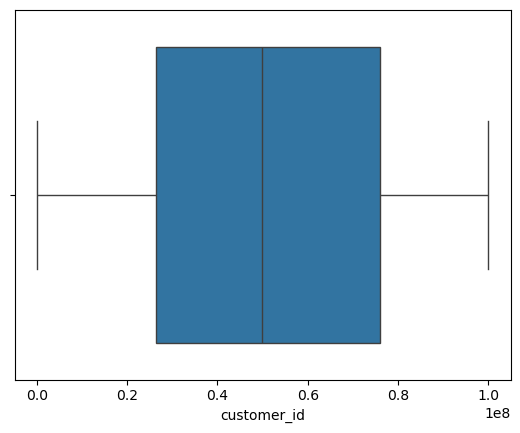

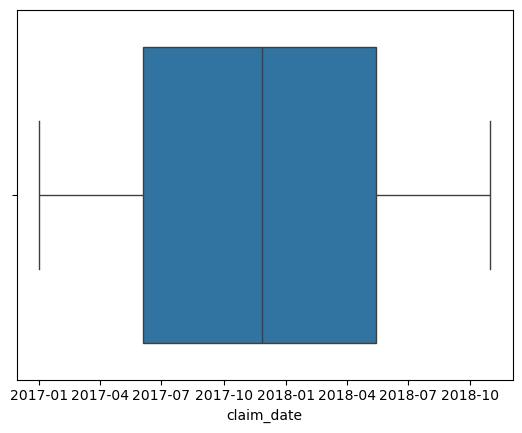

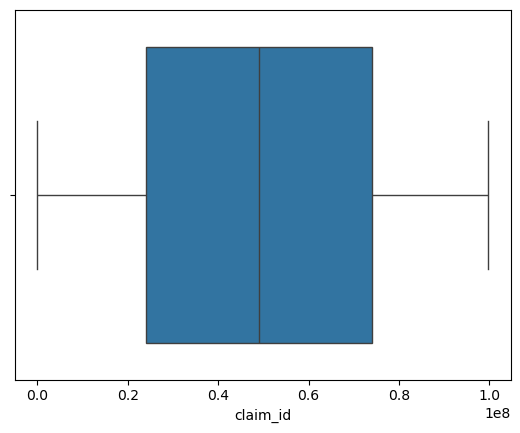

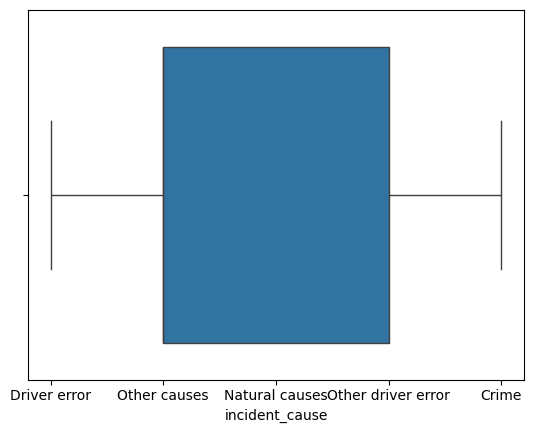

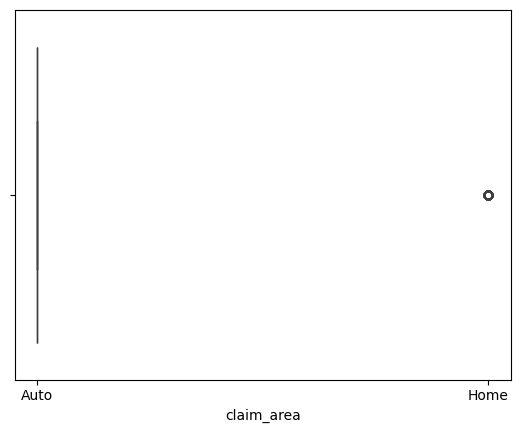

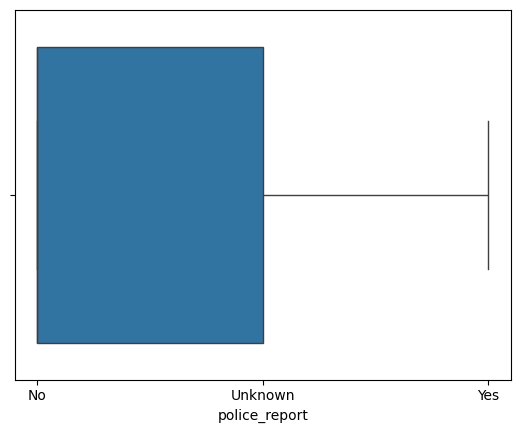

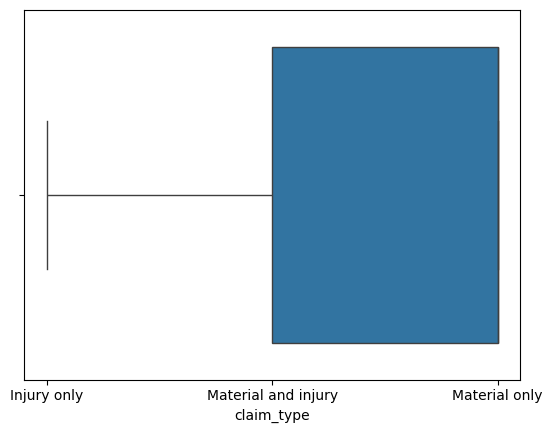

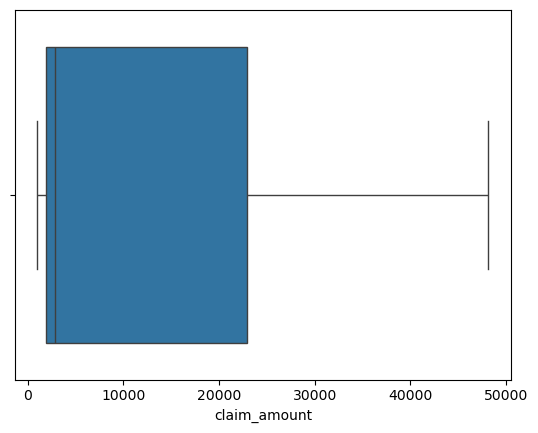

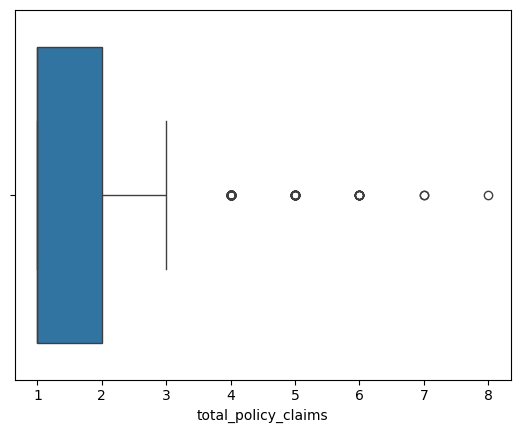

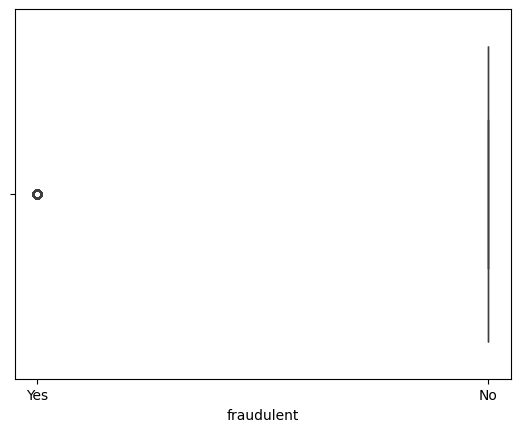

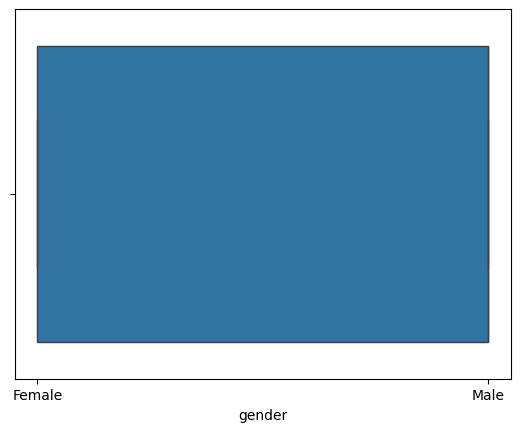

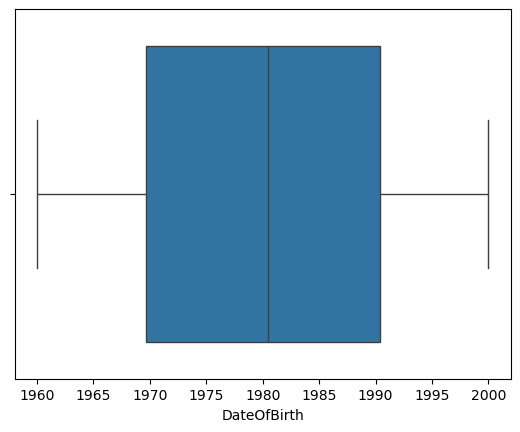

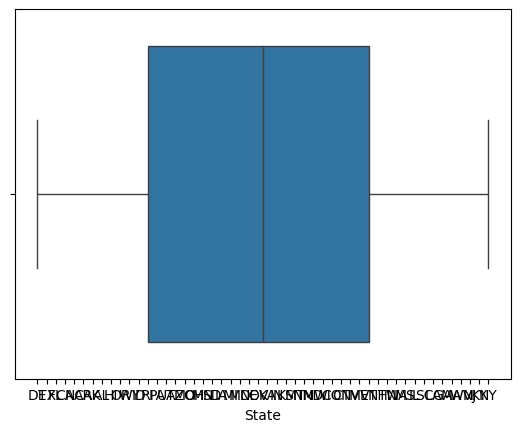

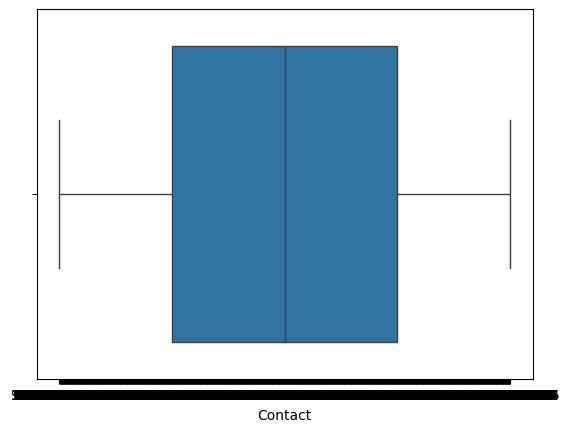

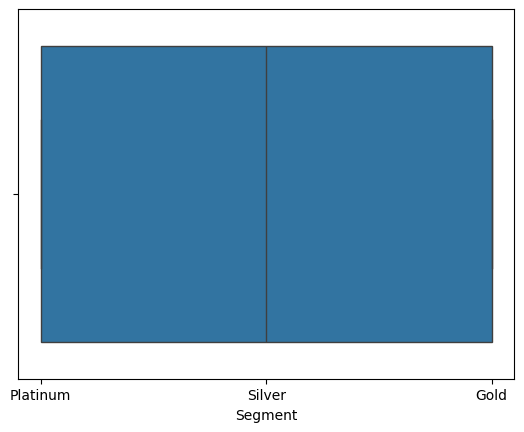

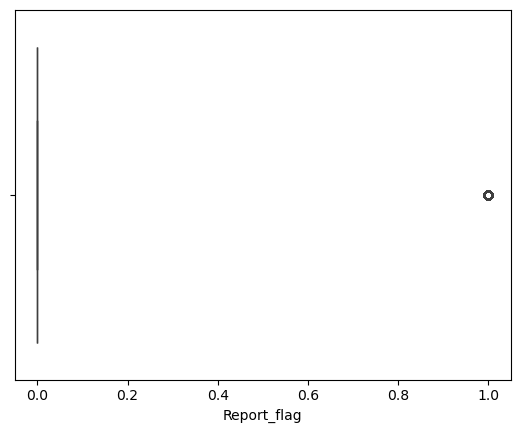

In [51]:
for i in Customer_claim_data:
    sns.boxplot(Customer_claim_data,x=Customer_claim_data[i])
    plt.show()

In [52]:
for i in Customer_claim_data:
    if Customer_claim_data[i].dtypes in ('float64','int64'):
        Q1= Customer_claim_data[i].quantile(0.25)
        Q3 = Customer_claim_data[i].quantile(0.75)
        IQR = Q3-Q1
        upper_l = Q3 +(1.5*IQR)
        lower_l = Q1 - (1.5*IQR)
        Customer_claim_data[i]= Customer_claim_data[i].clip(lower=lower_l,upper =upper_l )
        

 

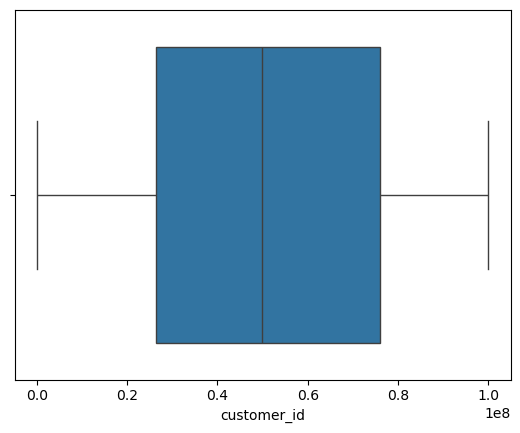

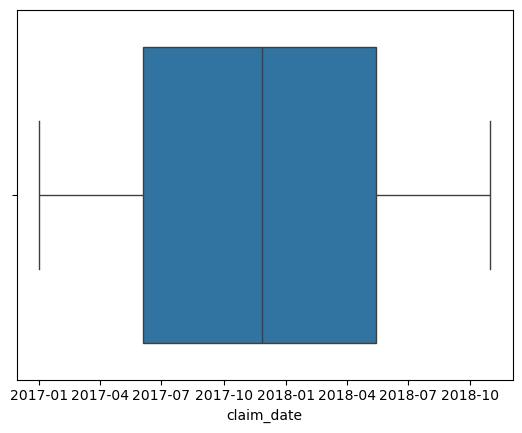

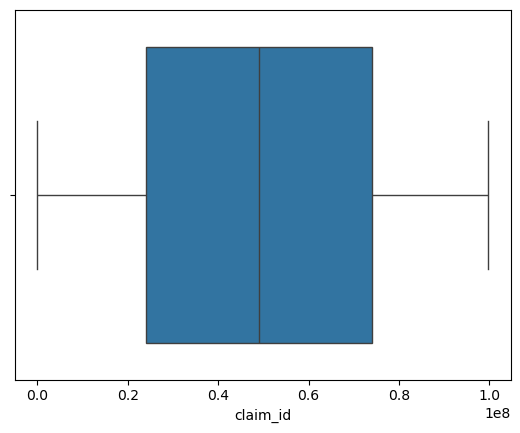

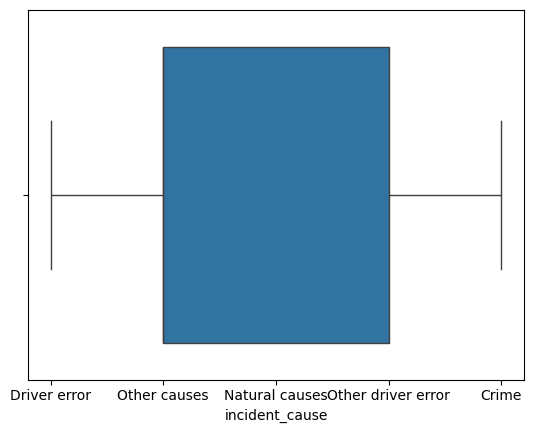

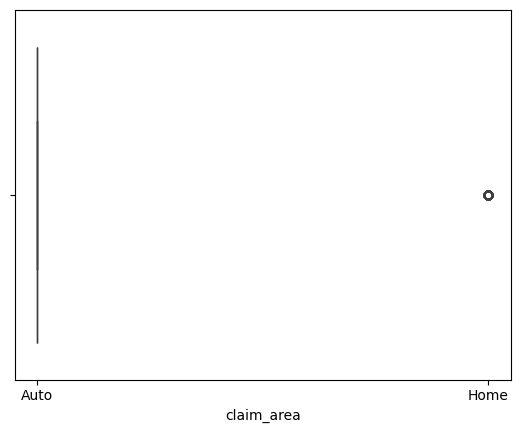

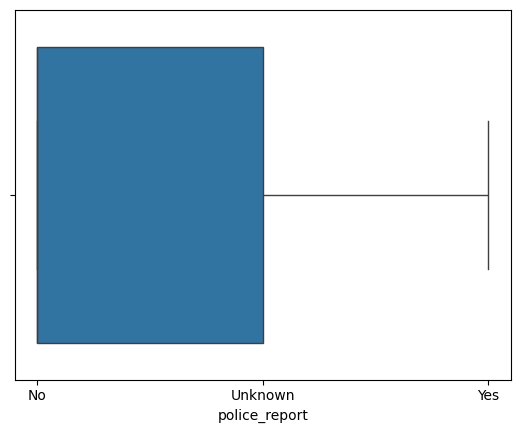

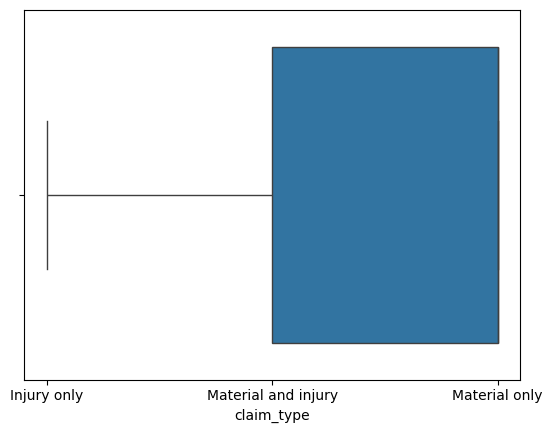

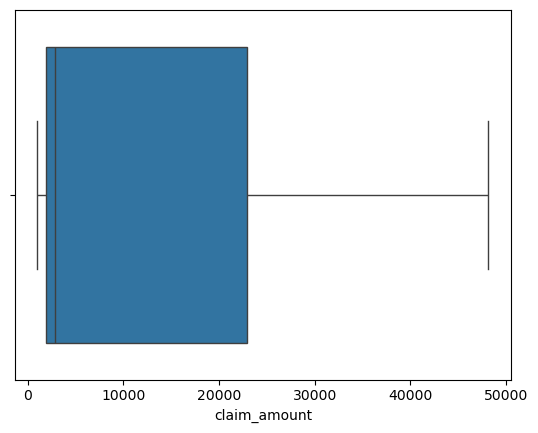

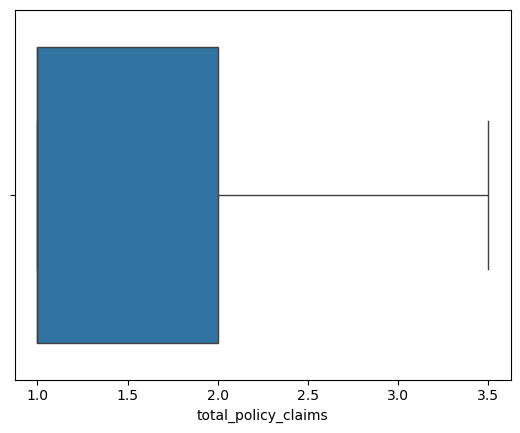

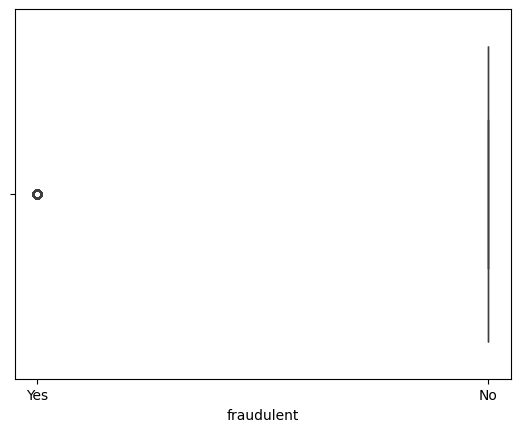

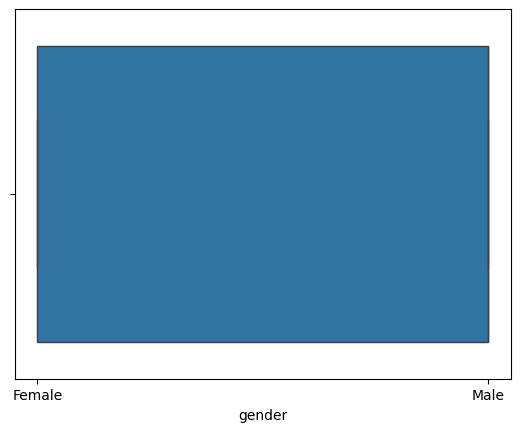

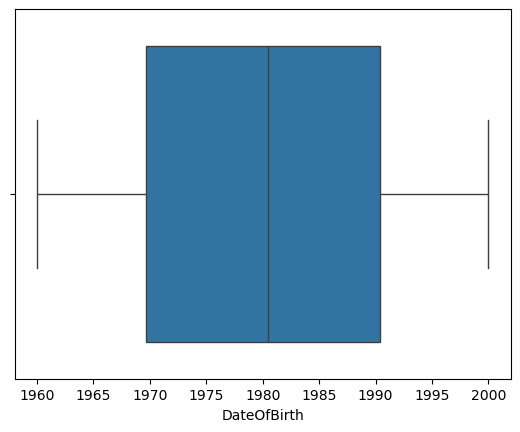

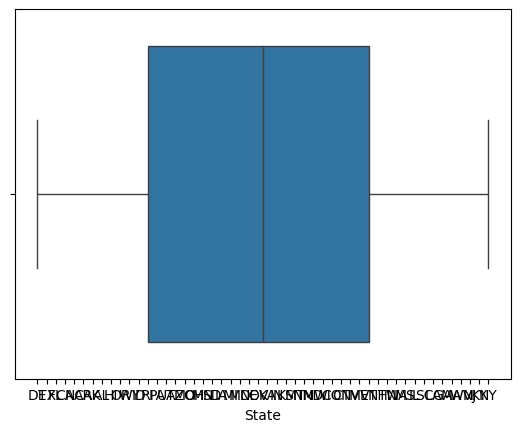

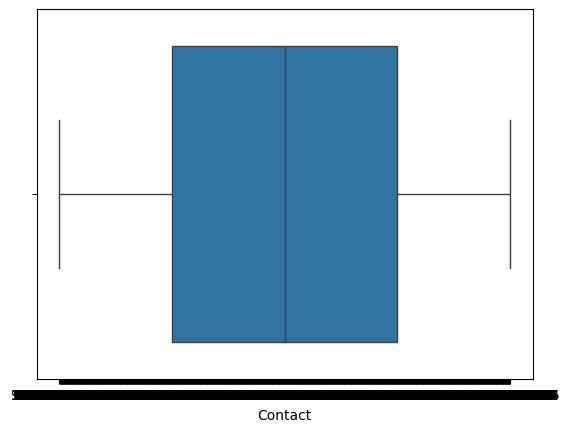

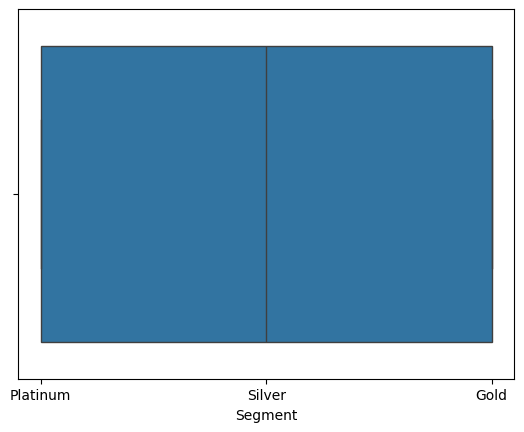

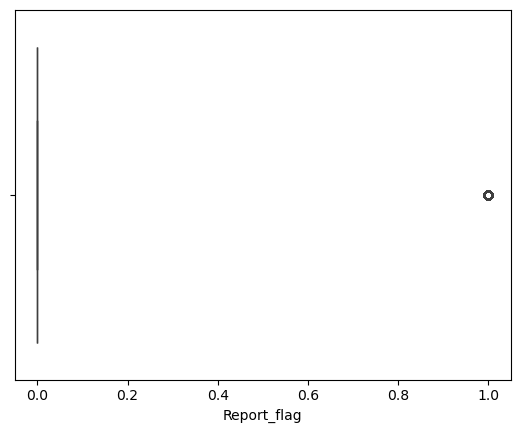

In [55]:
for i in Customer_claim_data:
    sns.boxplot(Customer_claim_data,x=Customer_claim_data[i])
    plt.show()

## The dataset has been cleaned , followed by outlier treatment . It is ready for further analysis.

# 7. Calculate the age of customers in years, Based on the age categorize the  customers according to the below criteria

In [ ]:
Children  < 18   Youth  18-30  ; Adult :30-60   Senior  : > 60

In [57]:
Customer_claim_data['Age']= pd.Timestamp.today().year- Customer_claim_data.DateOfBirth.dt.year

In [59]:
Customer_claim_data['Life_stage'] = np.where((Customer_claim_data.Age>=18) &(Customer_claim_data.Age<30),'Youth',np.where((Customer_claim_data.Age>=30) &(Customer_claim_data.Age<=60),'Adult','Senior'))

In [61]:
Customer_claim_data

,customer_id,claim_date,claim_id,incident_cause,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Report_flag,Age,Life_stage
0,154557,2018-04-10,69348631,Driver error,Auto,No,Injury only,12442.125121,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,0,46,Adult
1,263204,2018-04-04,40953049,Other causes,Auto,No,Material and injury,39192.000000,1.0,Yes,Male,1972-12-20,TX,173-892-6314,Silver,0,52,Adult
2,287476,2017-10-17,45780237,Natural causes,Auto,Unknown,Material only,1621.500000,2.0,Yes,Male,1988-07-28,FL,364-598-1549,Silver,0,36,Adult
3,441097,2018-03-21,89833962,Other causes,Auto,Yes,Material and injury,37040.000000,1.0,No,Male,1971-08-19,CA,187-348-8375,Gold,1,53,Adult
4,524545,2018-07-27,35782742,Other driver error,Auto,No,Injury only,35250.000000,3.0,No,Female,1980-08-10,NC,798-862-5398,Gold,0,44,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,99674324,2018-07-07,4549014,Other causes,Auto,No,Injury only,21480.000000,1.0,No,Male,1965-01-28,UT,517-562-4916,Silver,0,59,Adult
1074,99723844,2018-01-06,35453672,Natural causes,Auto,Yes,Material and injury,14360.000000,1.0,No,Female,1966-06-19,HI,457-752-1374,Gold,1,58,Adult
1075,99761663,2018-04-04,37305754,Natural causes,Auto,No,Material only,1242.000000,1.0,Yes,Female,1963-11-18,NC,643-246-4718,Silver,0,61,Senior
1076,99892000,2017-11-13,22960702,Driver error,Auto,No,Material only,2415.000000,2.0,Yes,Male,1995-06-08,OR,395-246-6172,Gold,0,29,Youth


#  8 .What is the average amount claimed by the customers from various segments

In [361]:
Customer_claim_data.pivot_table(index = 'Segment', values = 'claim_amount' ,aggfunc = 'mean').reset_index()

,Segment,claim_amount
0,Gold,12842.865910
1,Platinum,12369.178329
2,Silver,12263.036137


In [ ]:
# Customers from gold segment had the highest average claim amount , followed by Platinum and silver.


#  9. What is the total claim amount based on incident cause for all the claims  that have been done at least 20 days prior to 1st of October, 2018

In [383]:
Customer_claim_data[Customer_claim_data.claim_date <=(pd.Timestamp(day = 1 , month = 10 , year = 2018 ) - pd.DateOffset(days = 20 ))].pivot_table(index = 'incident_cause', values = 'claim_amount', aggfunc= 'sum').reset_index()

,incident_cause,claim_amount
0,Crime,7.216406e+05
1,Driver error,3.315136e+06
2,Natural causes,1.312451e+06
3,Other causes,3.722019e+06
4,Other driver error,3.276762e+06


In [377]:
pd.Timestamp(day = 1 , month = 10 , year = 2018 ) - pd.DateOffset(days = 20 )

Timestamp('2018-09-11 00:00:00')

# 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 


In [402]:
Customer_claim_data[((Customer_claim_data.State == 'TX') | (Customer_claim_data.State=='DE') | (Customer_claim_data.State == 'AK')) & (Customer_claim_data.incident_cause.str.contains(pat = 'Driver|driver'))]

,customer_id,claim_date,claim_id,incident_cause,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Report_flag,Age,Life_stage
0,154557,2018-04-10,69348631,Driver error,Auto,No,Injury only,12442.125121,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,0,46,Adult
6,684748,2018-07-14,7238381,Other driver error,Auto,No,Material only,2920.000000,2.0,No,Male,1977-08-03,AK,613-385-2863,Gold,0,47,Adult
22,2632562,2018-05-14,4506676,Other driver error,Home,Unknown,Material only,1400.000000,1.0,No,Female,1985-12-14,AK,498-597-9658,Platinum,0,39,Adult
28,3159546,2017-04-25,26716331,Other driver error,Auto,No,Injury only,17590.000000,3.5,No,Male,1987-10-20,TX,586-129-9752,Platinum,0,37,Adult
40,4669941,2017-11-06,70068,Driver error,Auto,Unknown,Injury only,29900.000000,1.0,Yes,Male,1982-08-03,AK,761-462-3458,Platinum,0,42,Adult
90,9205013,2018-06-17,40283824,Driver error,Auto,Yes,Material and injury,23430.000000,1.0,No,Male,1963-12-11,DE,239-368-6759,Platinum,1,61,Senior
110,11321295,2017-02-03,31574986,Driver error,Auto,No,Material only,2460.000000,2.0,No,Male,1965-11-13,DE,429-596-2169,Platinum,0,59,Adult
132,13687085,2018-01-13,37688454,Driver error,Auto,Unknown,Injury only,16760.000000,1.0,No,Male,1997-11-18,DE,137-146-7356,Platinum,0,27,Youth
156,15820948,2017-09-27,53831641,Driver error,Auto,Yes,Material and injury,14570.000000,1.0,No,Male,1964-02-22,TX,583-641-3184,Silver,1,60,Adult
187,18282409,2017-08-11,94983900,Driver error,Auto,No,Injury only,31020.000000,2.0,No,Female,1973-09-29,AK,326-215-7361,Gold,0,51,Adult


In [404]:
len(Customer_claim_data[((Customer_claim_data.State == 'TX') | (Customer_claim_data.State=='DE') | (Customer_claim_data.State == 'AK')) & (Customer_claim_data.incident_cause.str.contains(pat = 'Driver|driver'))])

35

In [ ]:
# Around 35 adults from TX, DE and AK claimed insurance for driver related issues and causes.

# 11.  Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on  the pie chart. 

array([<Axes: ylabel='claim_amount'>], dtype=object)

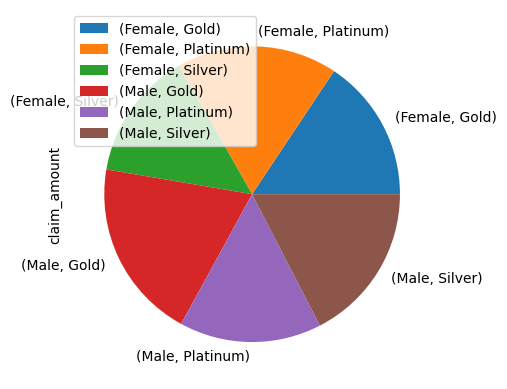

In [73]:
Customer_claim_data[['claim_amount','gender','Segment']].groupby(by=['gender','Segment'] ).sum().plot(kind = 'pie', subplots = True)

# 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [57]:
Gender_agg= Customer_claim_data[Customer_claim_data.incident_cause.str.contains(pat = 'Driver|driver')].pivot_table(index = 'gender', values = 'claim_amount', aggfunc = 'sum') 

In [80]:
Gender_agg

,claim_amount
gender,
Female,3.135943e+06
Male,3.974399e+06


array([<Axes: ylabel='claim_amount'>], dtype=object)

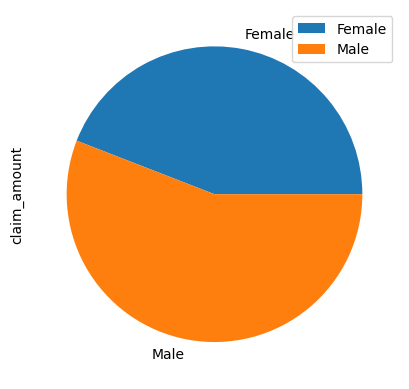

In [77]:
Gender_agg.plot(kind ='pie',subplots=True)

In [ ]:
# Out of both the gender , male customers had claimed the most for any type of driver related issues

# 13.  Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart

In [122]:
Customer_claim_data.rename(columns ={'Life_stage':'Age_group'},inplace = True)

In [124]:
Fraudulent_agg = Customer_claim_data[Customer_claim_data.fraudulent=='Yes'].pivot_table(index='Age_group', values ='fraudulent' , aggfunc ='count')

In [126]:
Fraudulent_agg

,fraudulent
Age_group,
Adult,194
Senior,26
Youth,25


<Axes: xlabel='Age_group'>

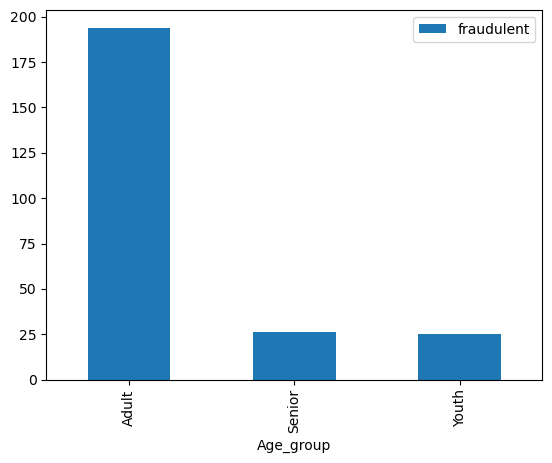

In [98]:
Fraudulent_agg.plot(kind ='bar'  )

In [ ]:
# 'Adult'age group had the maximum fraudulent policy claims.

# 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.   

In [55]:
Customer_claim_data['claim_Month']=Customer_claim_data.claim_date.dt.strftime('%B')
Customer_claim_data['claim_Month_no.']=Customer_claim_data.claim_date.dt.month

In [67]:
Month_agg = Customer_claim_data.pivot_table(index = ['claim_Month','claim_Month_no.'], values = 'claim_amount',aggfunc= 'sum').reset_index().sort_values(by= 'claim_Month_no.')

In [69]:
Month_agg

,claim_Month,claim_Month_no.,claim_amount
4,January,1,1.326753e+06
3,February,2,1.164304e+06
7,March,3,1.319952e+06
0,April,4,1.292395e+06
8,May,5,1.113985e+06
6,June,6,1.278673e+06
5,July,7,1.378780e+06
1,August,8,9.111184e+05
11,September,9,9.826043e+05
10,October,10,1.409162e+06


<Axes: xlabel='claim_Month'>

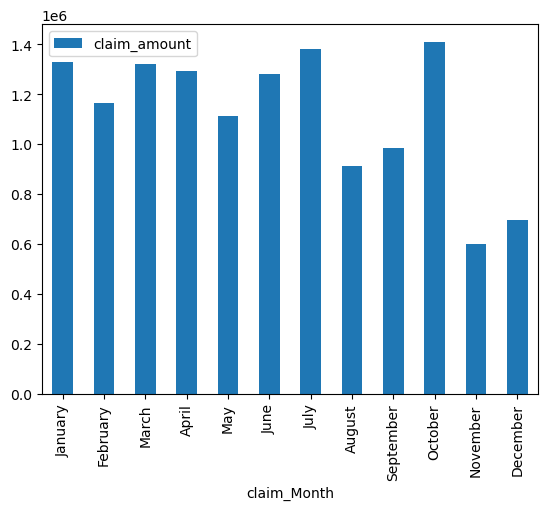

In [142]:
Month_agg.plot(kind ='bar', y='claim_amount', x= 'claim_Month')

In [ ]:
The total claim amount fluctuates across the 12 months , with the highest claimed amount in October followed by July.

# 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims NOT DONE !!!

In [ ]:
# Creating a facet that represent fradulent claims based on gender and age group

In [128]:
Customer_claim_data_fraud = Customer_claim_data[Customer_claim_data.fraudulent=='Yes'].pivot_table(index = ['gender','Age_group'], values = 'claim_amount' ) 

In [130]:
Customer_claim_data_fraud

claim_amount
gender Age_group              
Female Adult      12759.420223
       Senior      3332.294118
       Youth       9676.303589
Male   Adult      15017.682507
       Senior     19463.111111
       Youth       9699.647738

<Figure size 3000x3000 with 0 Axes>

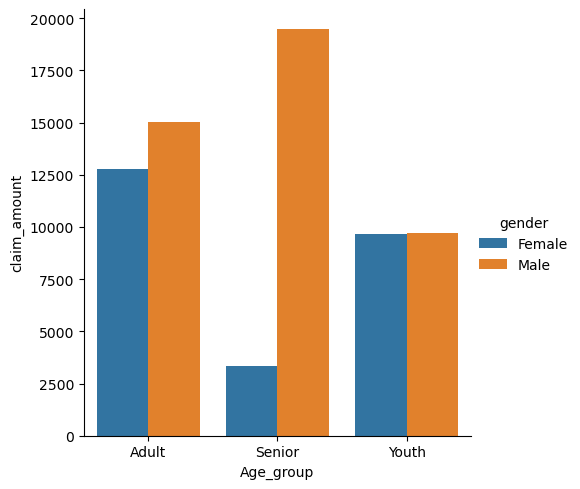

In [134]:
plt.figure(figsize = (30,30))
sns.catplot(data = Customer_claim_data_fraud, kind = 'bar' , x = 'Age_group', y ='claim_amount', hue = 'gender' )


In [ ]:
# As observed in the above graph in senior age group males tend to apply for fraud claims more as compared to females and the same in case of Adult age group.

In [ ]:
# Creating a facet that represent non- fradulent claims based on gender and age group

In [136]:
Customer_claim_data_non_fraud = Customer_claim_data[Customer_claim_data.fraudulent=='No'].pivot_table(index = ['gender','Age_group'], values = 'claim_amount' ) 

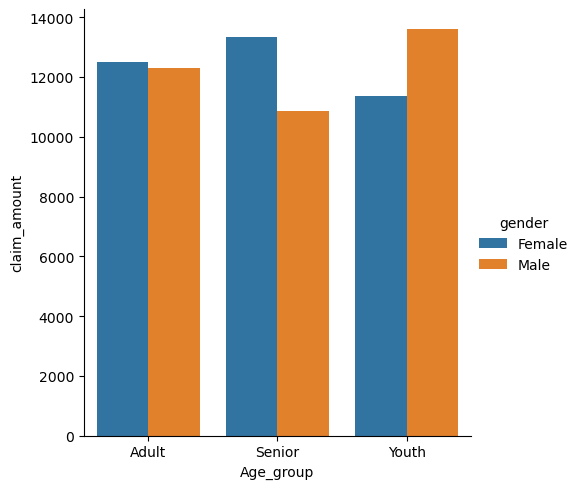

In [140]:
sns.catplot(data = Customer_claim_data_non_fraud , kind = 'bar', x = 'Age_group', y = 'claim_amount', hue ='gender' )

In [ ]:
# Based on the above graph in the Youth age group males go for non-fraud claims more than female. 

# STATISTICAL TESTS :


## 16. Is there any similarity in the amount claimed by males and females?

In [ ]:
# The hypothesis test we're conducting to compare the average amount claimed by males and females
# is called a two-sample t-test (also known as an independent t-test).It is used to determine if there are statistically 
# significant differences between the means of two independent groups (in this case, the amount claimed by males and females).

In [ ]:
Ho (Null Hypothesis) : amount claimed by males and females are equal
Ha (Alternate Hypothesis) : amount claimed by males and females are not equal

Based on industry standards we set the following parameters :

confidence level = 95 % 
Significance level = 5%
p critical= 0.05


In the given scenario our sample is claim amount and since we have the sample mean and standard deviation we would use T-test 


In [57]:
Female= Customer_claim_data[Customer_claim_data.gender =='Female']['claim_amount']
Male= Customer_claim_data[Customer_claim_data.gender =='Male']['claim_amount']

In [59]:
#Conducting t test :

T = stats.ttest_ind(Female,Male)
T

TtestResult(statistic=-0.9617536430640763, pvalue=0.3363894432719138, df=1076.0)

In [61]:
T[1] >0.05

True

In [ ]:
# Since the p value obtained is greater than the p critical that was set we fail to reject the null hypothesis(Ho).
# Thus the amount claimed by male and female are similar.

## 17.  Is there any relationship between age category and segment

In [ ]:
# To determine if there is a  relationship between age category and segment , we will use the Chi-Square Test of Independence.
# This test is appropriate for categorical variables, such as age category and segment .
# The Chi-Square Test of Independence assesses whether two categorical variables are independent or if there is a significant association between them.

In [ ]:
# Before going ahead with the test we need to create a contigency table.
# CONTIGENCY TABLE: a table that shows the frequency counts of each combination of categories

In [145]:
CONTIGENCY_TABLE = pd.crosstab(Customer_claim_data.Age_group, Customer_claim_data.Segment)

In [147]:
CONTIGENCY_TABLE

Segment,Gold,Platinum,Silver
Age_group,,,
Adult,285,283,267
Senior,38,34,30
Youth,48,44,49


In [ ]:
# (Null Hypothesis) Ho: There is no relationship between Age group and segment
# (Alternate Hypothesis) Ha: There is a relationship between Age group and segment

# We set the parameters at :

# confidence level = 95 % 
# significance level = 5%
# p critical= 0.05

# The sample is Age group and segment in Customer claim data 


In [151]:
relation_test = stats.chi2_contingency(CONTIGENCY_TABLE)

In [155]:
relation_test_pvalue = relation_test[1]

In [157]:
relation_test_pvalue >0.05

True

In [ ]:
# As P value is greater than P critical so we were unable to reject the null hypothesis and therefore we can say with 95% confidence that
# there is no significant relationship between Age_group and segment.

## 18.  The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [ ]:
# The goal is to determine whether the sample mean of the "claim amount" is significantly different from a hypothesized 2016-17 fiscal average which was $10,000.
#The one-sample t-test is ideal for this because it allows you to compare the sample mean to a target value ($10,000 in this case) 
# and see if the observed mean is statistically significantly different.

In [ ]:
# (Null Hypothesis) Ho: The average claim amount of current year is equal to 2016-17 fiscal average which was $10,000
# (Alternate Hypothesis) Ha: The average claim amount of current year is greater than 2016-17 fiscal average which was $10,000

# We set out parameters at :

# confidence level = 95 % 
# significance level = 5%
# p critical= 0.05

In [180]:
Customer_claim_data.claim_date.dt.year.value_counts()

claim_date
2017    593
2018    485
Name: count, dtype: int64

In [ ]:
# The provided dataset contains data on the current fiscal year 2017-2018

In [186]:
claim_amount_test = stats.ttest_1samp(Customer_claim_data.claim_amount,10000)

In [188]:
claim_amount_test_pvalue= claim_amount_test[1]

In [192]:
claim_amount_test_pvalue> 0.05 

False

In [196]:
# As P value is less than P critical so we reject null hypothesis and therefore we can say with 95% confidence 
# that the average claim amount of current year is greater than 2016-17 fiscal average which was $10,000.

## 19.  Is there any difference between age groups and insurance claims?

In [ ]:
#To analyze whether certain age groups have a different insurance claims, we would typically want to determine if there is a statistically
# significant difference in insurance claims across different age groups and thus we can use ANNOVA test.
# ANOVA is designed to compare the means of three or more groups. 
 

In [ ]:
# (Null Hypothesis) Ho: There is no difference in the insurance claims across different groups
# (Alternate Hypothesis) Ha: At least one group has difference in the insurance claims compared to the others.

# We set out parameters at :

# confidence level = 95 % 
# significance level = 5%
# p critical= 0.05

In [210]:
Customer_claim_data.Age_group.unique()

array(['Adult', 'Youth', 'Senior'], dtype=object)

In [214]:
Adult_Data = Customer_claim_data [Customer_claim_data.Age_group=='Adult']['claim_amount']
Youth_Data = Customer_claim_data [Customer_claim_data.Age_group=='Youth']['claim_amount']
Senior_Data = Customer_claim_data [Customer_claim_data.Age_group=='Senior']['claim_amount']

In [216]:
ANNOVA_test = stats.f_oneway(Adult_Data,Youth_Data,Senior_Data)
ANNOVA_test


F_onewayResult(statistic=0.7329129169210278, pvalue=0.48074721588568947)

In [218]:
ANNOVA_test_pvalue = ANNOVA_test [1]

In [220]:
ANNOVA_test_pvalue >0.05

True

In [ ]:
# As P value is greater than P critical so we fail to reject the null hypothesis and therefore we can say with 95% confidence that
# there is no difference in the insurance claims across different groups.

 ## 20. Is there any relationship between total number of policy claims and the claimed amount?

In [ ]:
# To assess the relationship between the total number of policy claims and the claimed amount, we would typically use a correlation test,
# specifically Pearson's correlation test , if both variables are continuous and normally distributed.

In [ ]:
# (Null Hypothesis) Ho: There is no relationship between total number of policy claims and the claimed amount.
# (Alternate Hypothesis) Ha: There is a  relationship between total number of policy claims and the claimed amount.

# We set out parameters at :

# confidence level = 95 % 
# significance level = 5%
# p critical= 0.05

In [201]:
Correlation_test = stats.pearsonr(Customer_claim_data.claim_amount,Customer_claim_data.total_policy_claims)

In [205]:
Correlation_test_pvalue = Correlation_test[1]

In [207]:
Correlation_test_pvalue >0.05

True

In [ ]:
# As P value is greater than P critical so we fail to reject the null hypothesis and therefore we can say with 95% confidence that
# there is no relationship between total number of policy claims and the claimed amount.